In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import IPython.display

### Define the model -

In [2]:
# define input data
X = np.asarray([[1, 2],
			 [3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))

# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding='same'))
# summarize model
model.summary()

[[1 2]
 [3 4]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3200)              323200    
_________________________________________________________________
reshape (Reshape)            (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 10, 10, 1)         1153      
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


### Generate a random image using CNN output -
This isn't part of the guide, but I was just curious to see how the generated image would look, so I used a random input value and scaled the image to 100x100 to visualize it.

Input data:
[[0.800485   0.6430514  0.66725407 0.92449353 0.76622626 0.01924043
  0.37930603 0.297631   0.17139726 0.25141958 0.01197617 0.71829747
  0.98081552 0.81771003 0.42551967 0.85748881 0.09775418 0.92371577
  0.72778801 0.68904847 0.15528005 0.35322446 0.52932941 0.47579241
  0.27954749 0.00948936 0.50988793 0.70436917 0.37289224 0.64184293
  0.30216868 0.09777442 0.52389493 0.32088604 0.11691503 0.69681254
  0.85126982 0.19189895 0.34268614 0.2941207  0.36512064 0.67516498
  0.93014749 0.34490797 0.34979173 0.20239289 0.29458248 0.24740243
  0.06036248 0.93466168 0.20985567 0.54107979 0.03497378 0.89230803
  0.98105358 0.36442345 0.92602099 0.80298835 0.36357946 0.33929927
  0.33316608 0.85703804 0.47860117 0.16526186 0.76401545 0.22184512
  0.01424949 0.99751488 0.36019145 0.36665397 0.92011812 0.22163223
  0.69503126 0.78669537 0.35429846 0.58435555 0.00301418 0.87454866
  0.96981073 0.935637   0.81222106 0.56366206 0.64284436 0.03349451
  0.08623999 0.03857996 0.1918134  0

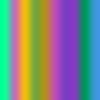

In [21]:
random_data = np.random.rand(1, 100)
print(f"Input data:\n{random_data}")

output = model.predict(random_data)
print(f"Output data:\n{output.reshape(1, 100)}")
reshaped_output = output.reshape(1, 10, 10)

generated_image = Image.fromarray(reshaped_output, mode='RGB')
generated_image = generated_image.resize((100, 100))
print(f"\nGenerated Image: {reshaped_output.shape} => 100x100")
IPython.display.display(generated_image)